## Image Enhancement and Noise Filtering

#### Import libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr

#### Upload the image

In [ ]:

image_path = '/content/xray_sample.png'

#### Load image in grayscale

In [ ]:
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)


array([[28, 28, 28, ..., 28, 28, 28],
       [28, 28, 28, ..., 28, 28, 28],
       [28, 28, 28, ..., 28, 28, 28],
       ...,
       [39, 39, 39, ..., 28, 28, 34],
       [39, 39, 39, ..., 28, 28, 34],
       [39, 39, 39, ..., 28, 34, 34]], dtype=uint8)
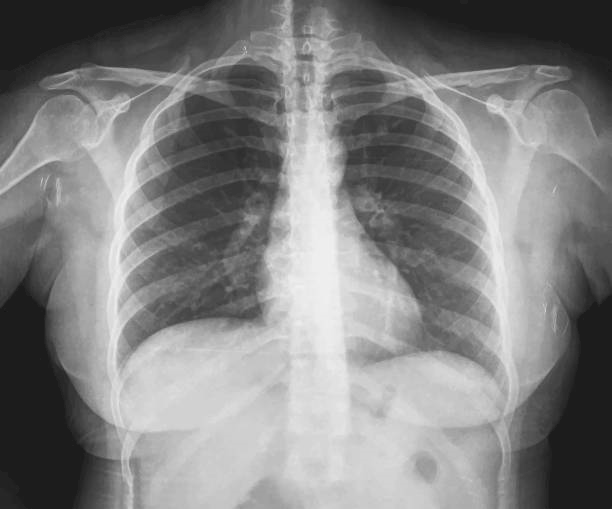

In [ ]:
img

### Apply Logarithmic Transformation

In [ ]:
c = 255 / np.log(1 + np.max(img))
log_transformed = c * np.log(1 + img.astype(np.float32))
log_transformed = np.array(log_transformed, dtype=np.uint8)

### Apply Histogram Equalization

In [ ]:
hist_equalized = cv2.equalizeHist(img)

### Display original, log-transformed, and hist-equalized images

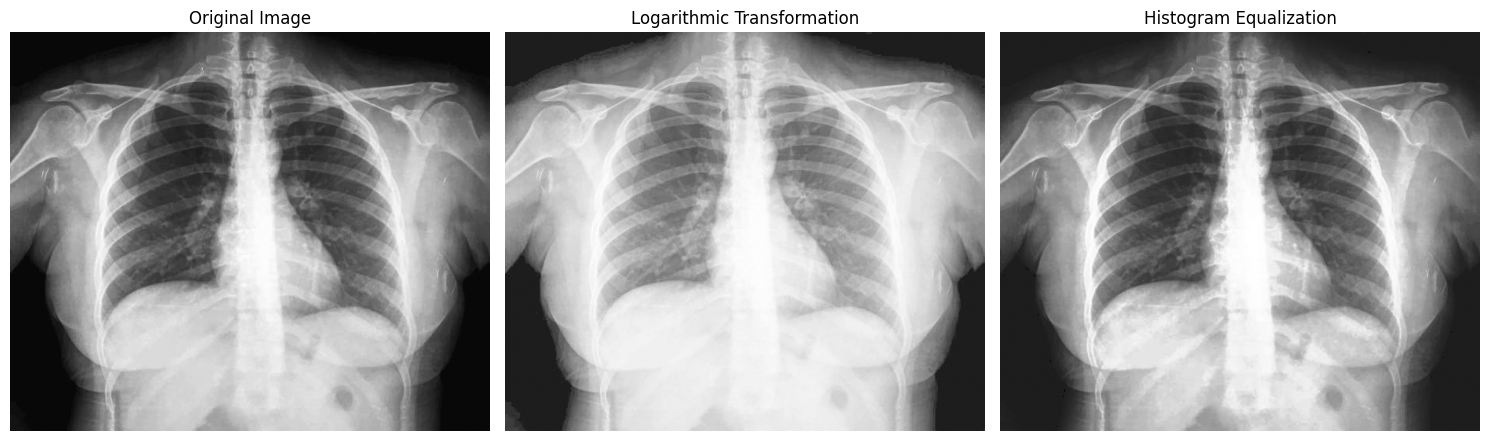

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(log_transformed, cmap='gray')
plt.title('Logarithmic Transformation')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(hist_equalized, cmap='gray')
plt.title('Histogram Equalization')
plt.axis('off')

plt.tight_layout()
plt.show()

###  Noise Addition and Filtering

### Introduce Gaussian noise (mean=0, variance=0.01)

In [ ]:
noisy_img = random_noise(img, mode='gaussian', mean=0, var=0.01)
noisy_img = np.array(255*noisy_img, dtype=np.uint8)

In [ ]:
# Apply Mean Filter
mean_filtered = cv2.blur(noisy_img, (3, 3))

In [ ]:
# Apply Median Filter
median_filtered = cv2.medianBlur(noisy_img, 3)

### Display noisy vs filtered images

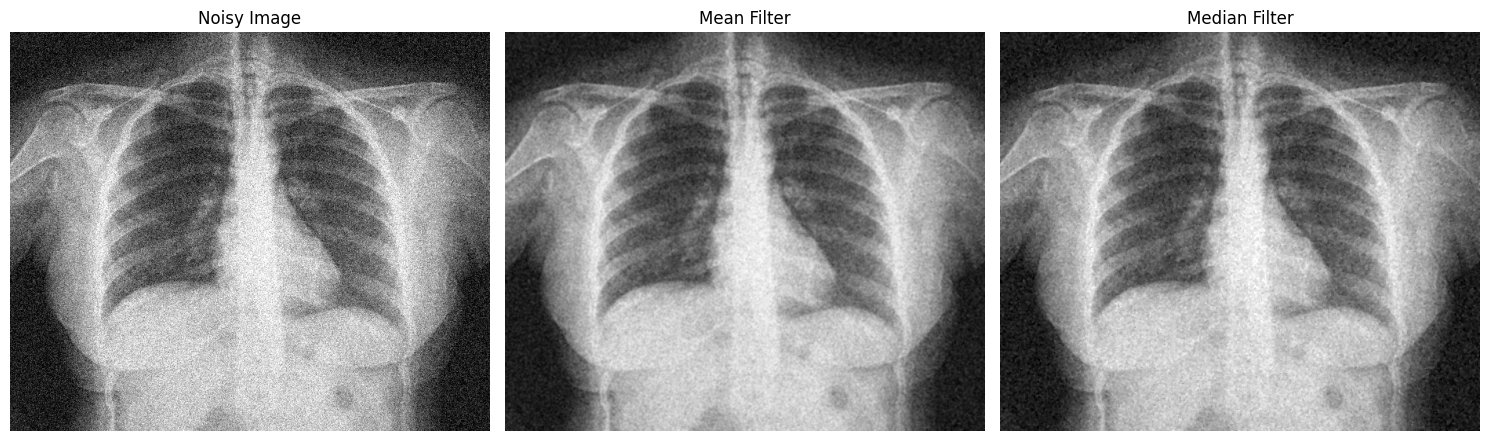

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mean_filtered, cmap='gray')
plt.title('Mean Filter')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filter')
plt.axis('off')

plt.tight_layout()
plt.show()

### PSNR Calculation

#### Compute PSNR for both filters

In [ ]:
psnr_mean = psnr(img, mean_filtered)
psnr_median = psnr(img, median_filtered)

print(f"PSNR after Mean Filter: {psnr_mean:.2f} dB")
print(f"PSNR after Median Filter: {psnr_median:.2f} dB")


PSNR after Mean Filter: 29.43 dB
PSNR after Median Filter: 27.54 dB


## Analysis of Image Enhancement and Noise Filtering

Logarithmic transformation and histogram equalization both enhanced image contrast, improving the visibility of medical features.

Noise filtering using the median filter was more effective than the mean filter in removing noise while preserving anatomical structures.

PSNR analysis quantitatively confirmed the better performance of the median filter.